# **PH 431: *Exploration of Electrodynamic Simulations Project*** by Dan Jang

## **Abstract**
Based on concepts explored in *PH 431: Electricity & Magnetism I* and from our textbook, *Introduction to Electrodynamics* by David J. Griffiths [[1]](https://www.cambridge.org/highereducation/books/introduction-to-electrodynamics/3AB220820DBB628E5A43D52C4B011ED4#overview), we created a computational physics project based on *Python* for exploring the simulation of various electrodynamics phenomena, particularly in the modeling and visualization of *electric fields*, *potentials*, and *point charges*.

Our exploration project was primarily based on a deconstructed, piece-by-piece implementation of these electrodynamics' topics in electromagnetism, where a *Python*-based, *Project Jupyter Notebook* [[2]](https://jupyter.org) was used to highlight particular parts & pieces of our project, with specific examples of electromagnetic phenomena and situations.

Our project primarily features the *PyCharge* [[3]](http://arxiv.org/abs/2107.12437) and *PyGame* [[4]](https://www.pygame.org/wiki/about) libraries – as well as the implementation of other libraries and visual or mathematical methods of computational physics.

The goal of our project was to help provide an elementary, or otherwise easy-to-under introduction to electromagnetism, particularly on the 3D representation of electric fields & potentials and moving point charges in those fields and potentials.

## Part 1: ***Initialization & Setup***

In [1]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Initialization of Project Libraries, Constants, & Jupyter Notebook

import pygame as pgame
import numpy as np
#import math
import pycharge as pyc
import sys
import os
import matplotlib as mplotlib
import matplotlib.pyplot as plot
import threading
import tkinter as tk
from tkinterweb import HtmlFrame
from tkinter import ttk
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from ipywidgets import widgets as wd
from ipywidgets import interactive
from IPython.display import display, HTML
import imageio
from PIL import Image, ImageTk
import requests
from io import BytesIO


# ### For Part 4: Point Charges, ffmpeg (https://ffmpeg.org) is used for creating the animated GIF
# def check_for_ffmpeg():
#     ffmpeg_path = imageio.plugins.ffmpeg.get_exe()
    
#     if not os.path.isfile(ffmpeg_path):
#         # print("ffmpeg not found. Please install ffmpeg!")
#         # sys.exit(1)
#         print("Looks like ffmpeg was not found, ergo, downloading ffmpeg (from https://ffmpeg.org/ using the imageio library)")
#         imageio.plugins.ffmpeg.download()
        
#     return ffmpeg_path

# ffmpeg_path = check_for_ffmpeg()


pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Part 2: ***Electric Fields***

In [2]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 2 - Electric Field Simulation Demonstration
### Credits to "Simulating Electric Field Using Python" by The Alternate Physics (https://www.youtube.com/watch?v=ujvVKLxRi14) for inspiration

## Initialize PyGame
pgame.init()

## Dimensional & Physical Constants
w, h = 1000, 1000
q_radius = 10
K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)

## Color Constants
black_color = (47, 47, 56)
white_color = (255, 255, 255)
red_color = (255, 62, 62)
blue_color = (62, 62, 255)

## Defining point charges as a class
class PointCharge:
    
    def __init__(self, position, charge):
        
        self.position = position
        self.charge = charge
    
    def point(self, screen):
        
        color = red_color if self.charge > 0 else blue_color
        pgame.draw.circle(screen, color, self.position, q_radius)
        
## Electric field function for calculating the electric field line vectors at a given point charge due to its charge
def e_field(point_charge, point):
    
    q = point_charge.charge
    r_vector = np.array(point) - np.array(point_charge.position)
    r_magnitude = np.linalg.norm(r_vector)
    
    if r_magnitude == 0:
        return np.array([0, 0])
    
    r_carot = (r_vector / r_magnitude)
    e_vector = (K * q / r_magnitude ** 2) * r_carot
    
    return e_vector

## Initialize the PyGame Demo Window for Part 2: Electric Field Simulation
efield_demo = pgame.display.set_mode((w, h))
pgame.display.set_caption("PH 431 Project: Part 2 - Electric Field Simulation")

## Main Function for Part 2: Electric Field Simulation
pointcharges = []
state = True

while state:
    efield_demo.fill(white_color)
    
    # Main simulation loop for event-handling
    for event in pgame.event.get():
        if event.type == pgame.QUIT:
            state = False
            
        # If the user presses either the left or right mouse buttonz
        elif event.type == pgame.MOUSEBUTTONDOWN:
            position = pgame.mouse.get_pos()
            
            # Left-click, add positive point charge
            if event.button == 1:
                pointcharges.append(PointCharge(position, 1e-9))
                
            # Right-click, add negative point charge
            elif event.button == 3:
                pointcharges.append(PointCharge(position, -1e-9))
            
    # Loop for drawing the point charges
    for p in pointcharges:
        p.point(efield_demo)
        
    # Calculating & drawing out the electric field line-vectors
    for y in range(0, h, 20):
        for x in range(0, w, 20):
            total_e = np.array([0.0, 0.0])
            
            for c in pointcharges:
                total_e += e_field(c, (x, y))
            
            e_magnitude = np.linalg.norm(total_e)
            if e_magnitude > 0:
                e_direction = total_e / e_magnitude
                e_position = (x + int(e_direction[0] * 10), y + int(e_direction[1] * 10))
                pgame.draw.line(efield_demo, black_color, (x, y), e_position)
    
    # After drawing the electric field line-vectors, update the display
    pgame.display.flip()

# End simulation
pgame.quit()


## Part 3: ***Electric Potential***

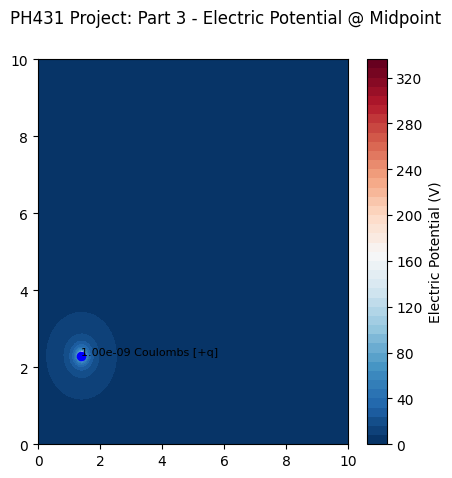

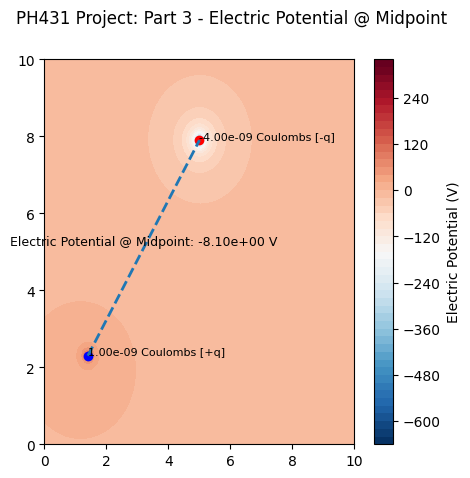

In [10]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 3 - Electric Potentials

## Physical Constants & Arrays
K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)
pointcharges = []
positions = []

## Widgets for user-input of point charges' positions & charge-values
charge_val = wd.FloatText(value=1e-9, description='Charge Value (C):', step=1e-9)

charge_xpos = wd.FloatSlider(min=0.1, max=10, step=0.1, description='X-position')
charge_ypos = wd.FloatSlider(min=0.1, max=10, step=0.1, description='Y-position')

new_pointcharge_button = wd.Button(description='Add le Point Charge')
reset_pointcharges_button = wd.Button(description='Reset')

output = wd.Output()

### Helper Functions for Widgets
## Function for a new point charge
def new_pcharge(_):
    
    with output:
        if len(pointcharges) < 2:
            pcharge = charge_val.value
            position = (charge_xpos.value, charge_ypos.value)
            pointcharges.append(pcharge)
            positions.append(position)
            refresh()
            
        else:
            print("Whoopsie, looks like there are already two point charges placed - please click reset to add new point charges!")

## Function for resetting the point charges
def reset_pcharges(_):
    
    global pointcharges, positions
    
    with output:
        pointcharges = []
        positions = []
        
        refresh()

## Refreshing function for the displayed plot
def refresh():
    
    output.clear_output(wait=True)
    figure, ax = plot.subplots(figsize=(5, 5))
    
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    V = np.zeros_like(X)
    
    for pc, p in zip(pointcharges, positions):
        r = np.sqrt((X - p[0]) ** 2 + (Y - p[1]) ** 2)
        V += K * pc / r
    
    vmin = np.min(V)
    vmax = np.max(V)
    
    fieldmap = ax.contourf(X, Y, V, levels=50, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    cbar = plot.colorbar(fieldmap, ax=ax, label='Electric Potential (V)')
    
    for pc, p in zip(pointcharges, positions):
        ax.plot(p[0], p[1], 'bo' if pc > 0 else 'ro')
        #pcharge_txt = f'{pc:.2e} V'
        if pc > 0:
            ax.text(p[0], p[1], f'{pc:.2e} Coulombs [+q]', color='black', fontsize=8)
        else:
            ax.text(p[0], p[1], f'{pc:.2e} Coulombs [-q]', color='black', fontsize=8)
    
    if len(pointcharges) == 2:
        ax.plot([positions[0][0], positions[1][0]], [positions[0][1], positions[1][1]], linestyle='dashed', lw=2)
        midpoint_Q = ((positions[0][0] + positions[1][0]) / 2, (positions[0][1] + positions[1][1]) / 2)
        midpoint_Q_potential = sum(K * pc / np.sqrt((midpoint_Q[0] - p[0]) ** 2 + (midpoint_Q[1] - p[1]) ** 2) 
                                   for pc, p in zip(pointcharges, positions))
        ax.text(midpoint_Q[0], midpoint_Q[1], f'Electric Potential @ Midpoint: {midpoint_Q_potential:.2e} V', color='black', ha='center', va='bottom', fontsize=9)
        figure.suptitle('PH431 Project: Part 3 - Electric Potential @ Midpoint', fontsize=12)
        plot.savefig("ph431-project-part3-electric-field-at-midpoint.png")
    
    figure.suptitle('PH431 Project: Part 3 - Electric Potential @ Midpoint', fontsize=12)
    
    with output:
        display(figure)

## Widget button mapping
new_pointcharge_button.on_click(new_pcharge)
reset_pointcharges_button.on_click(reset_pcharges)

## Display le widgetz
wd.VBox([wd.HBox([charge_val, charge_xpos, charge_ypos]),
         wd.HBox([new_pointcharge_button, reset_pointcharges_button]),
         output])


## Part 4: ***Point Charges***

In [4]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 4 - Point Charges
## Credits to PyCharge, for the examples/oscillating_animation.py (below is modified implementation of the example)

## Constants
limit = 50e-9
gridsize = 1000
qlimit = 46e-9
qgridsize = 17
n_frames = 36
fps = 12

def new_animation(amplitude, omega, charge_magnitude):
    
    x, y, z = np.meshgrid(np.linspace(-limit, limit, gridsize), 0,
                          np.linspace(-limit, limit, gridsize), indexing='ij')
    
    pc = pyc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                               amplitude=amplitude, omega=omega, q=charge_magnitude)
    sim = pyc.Simulation(pc)
    
    figure, ax = plot.subplots(figsize=(5, 5))
    ax.set_position([0, 0, 1, 1])
    
    if charge_magnitude > 0:
        im_plot = ax.imshow(np.zeros((gridsize, gridsize)), origin='lower',
                            extent=(-limit, limit, -limit, limit), vmax=7, cmap='seismic_r')
    else:
        im_plot = ax.imshow(np.zeros((gridsize, gridsize)), origin='lower',
                            extent=(-limit, limit, -limit, limit), vmax=7, cmap='RdBu_r')
    ax.set_xticks([])
    ax.set_yticks([])
    im_plot.set_norm(mplotlib.colors.LogNorm(vmin=1e5, vmax=1e8))
    
    qx, qy, qz = np.meshgrid(
        np.linspace(-qlimit, qlimit, qgridsize), 0,
        np.linspace(-qlimit, qlimit, qgridsize), indexing='ij'
    )
    Q = ax.quiver(qx, qz, qx[:, 0, :], qz[:, 0, :],
                  scale_units='xy')
    if charge_magnitude > 0:
        position = ax.scatter(pc.xpos(0), 0, s=5, marker='o', c='blue')
    else:
        position = ax.scatter(pc.xpos(0), 0, s=5, marker='o', c='red')
        
    def _refresh_animation(frame):
        
        debugtxt = f"\rProcessing animation @ frame # {frame+1}/{n_frames}..."
        sys.stdout.write(debugtxt)
        sys.stdout.flush()
        
        t = frame * dt
        total_e = sim.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
        
        u = total_e[0][:, 0, :]
        v = total_e[2][:, 0, :]
        im_plot.set_data(np.sqrt(u ** 2 + v ** 2).T)
        
        total_e = sim.calculate_E(
            t=t, x=qx, y=qy, z=qz, pcharge_field='Total'
        )
        u = total_e[0][:, 0, :]
        v = total_e[2][:, 0, :]
        r = np.power(np.add(np.power(u, 2), np.power(v, 2)), 0.5)
        
        Q.set_UVC(u / r, v / r)

        position.set_offsets((pc.xpos(t), 0))
        
        return im_plot
    
    def _init_animation():
        #return im_plot
        pass
    
    dt = 2 * np.pi / pc.omega / n_frames
    
    anim = FuncAnimation(figure, _refresh_animation,
                         frames=n_frames, blit=False, init_func=_init_animation
                         )
    figure.suptitle('PH431 Project: Part 4 - Oscillating Point Charge', fontsize=12)
    plot.close(figure)
    
    #gifmaker = animation.FFMpegWriter(fps=12)
    #gifmaker = animation.PillowWriter(fps=fps)
    
    #anim.save('ph431-part4-oscillating-pointcharge.gif', writer=gifmaker, dpi=200)
    # gifmaker = animation.ImageMagickWriter(fps=12, codec=h264)
    # anim.save('ph431-part4-oscillating-pointcharge.gif', writer=gifmaker, dpi=200)
    
    #sys.stdout.flush()
    
    return anim#.to_jshtml(fps=fps)

## Widget Buttons for Part 4: Point Charges
input_amplitude = wd.FloatText(value=2e-9, min=1e-9, max=5e-9, step=1e-10, description='Charge Amplitude (m):')
input_omega = wd.FloatText(value=7.49e+16, min=1e+16, max=1e+17, step=1e+15, description='Angular Frequency (rad/s):')
input_charge = wd.FloatText(value=1e-19, min=1e-20, max=1e-18, step=1e-20, description='Charge Magnitude (C):')
create_animation_button = wd.Button(description="Ready to oscillate?")
output = wd.Output()

## Display le widgetz
display(input_amplitude, input_omega, input_charge, create_animation_button, output)

## Function for widget button click
def button_has_been_clicked(_):
    le_animation = new_animation(input_amplitude.value, input_omega.value, input_charge.value)
    html_wd = le_animation.to_jshtml(fps=fps)
    
    gifmaker = animation.PillowWriter(fps=fps)
    le_animation.save('ph431-project-part4-oscillating-point-charge.gif', writer=gifmaker, dpi=200)
    
    debugtxt = f"\rProcessed the full animation!..."
    sys.stdout.write(debugtxt)
    #display(html_wd)
    with output:
        output.clear_output(wait=True)
        display(HTML(html_wd))

## Widget button mapping
create_animation_button.on_click(button_has_been_clicked)

FloatText(value=2e-09, description='Charge Amplitude (m):', step=1e-10)

FloatText(value=7.49e+16, description='Angular Frequency (rad/s):', step=1000000000000000.0)

FloatText(value=1e-19, description='Charge Magnitude (C):', step=1e-20)

Button(description='Ready to oscillate?', style=ButtonStyle())

Output()

Processed the full animation!...6/36...

Processed the full animation!...6/36...

## Part 5: ***Full GUI-Encapsulated Project Program***

In [ ]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 5 - Full GUI-Encapsulated Project Program

### Initialization (incase this is ran standalone outside of Jupyter Notebook)
import pygame as pgame
import numpy as np
#import math
import pycharge as pyc
import sys
import os
import matplotlib as mplotlib
import matplotlib.pyplot as plot
import threading
import tkinter as tk
from tkinterweb import HtmlFrame
from tkinter import ttk
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from ipywidgets import widgets as wd
from ipywidgets import interactive
from IPython.display import display, HTML
import imageio
from PIL import Image, ImageTk
import requests
from io import BytesIO

### Main tkinter-based GUI encapulation-wrapper program
class CoolGUI(tk.Tk):
    
    def __init__(self):
        
        super().__init__()
        self.option_add('*font', ('comic sans ms', 12, 'bold'))
        self.title("PH 431 Project - Exploration of Electrodynamic Simulations: Electric Fields, Potentials, & Point Charges by Dan J.")
        
        # Initialize tabs for our three simulation sections,
        # ...Part 2: Electric Field Simulation, Part 3: Electric Potential @ Midpoint, Part 4: Oscillating Point Charge.
        simulation_tabs = ttk.Notebook(self)
        self.initialize_part1(simulation_tabs)
        self.create_part2_tab(simulation_tabs)
        self.create_part3_tab(simulation_tabs)
        self.create_part4_tab(simulation_tabs)
        # Bonus: Fun MIDI music-player
        #self.plug_in_ipod(simulation_tabs)
        
        # Pack all three simulation-section tabs into our main GUI window!
        simulation_tabs.pack(expand=1, fill="both")
    
    def initialize_part1(self, simulation_tabs):
        part1_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part1_tab, text="Main Page!")
        
        part1 = Part1(part1_tab)
        part1_ipod = iPod(part1_tab)
        
        part1.pack(side="top", fill="both", expand=True)
        part1_ipod.pack(side="bottom", fill="both", expand=True)
    
    # Initializing the tab for Part 2: Electric Field Simulation
    def create_part2_tab(self, simulation_tabs):
        
        part2_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part2_tab, text="Part 2: Electric Field Simulation Minigame")
        
        part2 = Part2(part2_tab)
        part2.pack(side="top", fill="both", expand=True)
    
    # Initializing the tab for Part 3: Electric Potential @ Midpoint
    def create_part3_tab(self, simulation_tabs):
        
        part3_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part3_tab, text="Part 3: Electric Potential @ Midpoint Calculation & Graphical Visualization")
        
        part3 = Part3(part3_tab)
        part3.pack(side="top", fill="both", expand=True)
    
    # Initializing the tab for Part 4: Oscillating Point Charge
    def create_part4_tab(self, simulation_tabs):
        
        part4_tab = ttk.Frame(simulation_tabs)
        simulation_tabs.add(part4_tab, text="Part 4: Oscillating Point Charge Simulation")
        
        part4 = Part4(part4_tab)
        part4.pack(side="top", fill="both", expand=True)
    
    # # Initializing the bonus iPod music player (MIDI player using PyGame)
    # def plug_in_ipod(self, simulation_tabs):
        
    #     ipod_tab = ttk.Frame(simulation_tabs)
    #     simulation_tabs.add(ipod_tab, text="iPod - 🎵 Now Playing: Africa by Toto... 🎷")
        
    #     ipodplayer = iPod(ipod_tab)
    #     ipodplayer.pack(side="top", fill="both", expand=True)

### Extra: Fun MIDI music-player
class iPod(tk.Frame):
    
    def __init__(self, root):
        
        super().__init__(root)
        
        self.turn_on_ipod()
        
        #self.play_button_tab = ttk.Frame(self.notebook)
        #self.stop_button_tab = ttk.Frame(self.notebook)
        
        self.play_button = tk.Button(self, text="▶️", command=self.tunes)
        self.stop_button = tk.Button(self, text="⏹", command=self.stop_tunes)
        self.play_button.grid(row=5, column=0)
        self.stop_button.grid(row=5, column=1)
    
        self.tunes()
    
    def turn_on_ipod(self):
        
        clock = pgame.time.Clock()
        pgame.mixer.init(44100, -16, 2, 1024)
        pgame.mixer.music.set_volume(0.8)
        
        #pgame.mixer.init()
        
        #curr = os.path.dirname(os.path.abspath(__file__))
        #curr = os.getcwd()
        
        # Credits to BitMidi for the MIDI file, https://bitmidi.com/toto-africa-mid
        self.musicfile = "toto-africa.mid"#os.path.join("toto-africa.mid")#curr, "toto-africa.mid") #"toto-africa.mid" 
        #self.
        #self.channel = pgame.mixer.Channel(0)
        self.itunes = pgame.mixer.music#.load(self.musicfile)#pgame.mixer.music.load(self.musicfile)
        self.itunes.load(self.musicfile)
    
    def tunes(self):
        
        #self.channel.play(self.itunes)
        if not self.itunes.get_busy():
            self.itunes.load(self.musicfile)
            self.itunes.rewind()
            #pgame.mixer.music.play()
            #self.channel.play(self.itunes, loops=-1)
            self.itunes.play()
    
    def stop_tunes(self):
        
        #pgame.mixer.music.stop()
        self.itunes.stop()
        self.itunes.unload()
        #pgame.quit()

### GUI Program main page & help guide
class Part1(tk.Frame):
    
    #### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
    ### Initialization of Project Libraries, Constants, & Jupyter Notebook
    def __init__(self, root):
        
        super().__init__(root)
        self.maintext = "Welcome to PH 431 Project: Exploration of Electrodynamic Simulations by Dan J.! \n\n" + \
                        "This project features three electrodynamic simulations:\n\n" + \
                        "Part 2: Electric Field Simulation (Left-click adds a positive charge & Right-click adds a negative charge)\n" + \
                        "Part 3: Calculating & Heatmap Visualization of the Electric Potential @ Midpoint (Between Two Point Charges)\n" + \
                        "Part 4: Oscillating Point Charge Animation\n\n" + \
                        "Thank you for checking out my project. I hope you may find it interesting!"
        self.mainpage = tk.Label(self, text=self.maintext, font=("Times New Roman", 15))
        self.mainpage.grid(row=0, column=0, pady=50, sticky="WENS")
        
        # Mild get-request exploration for downloading the cool electroscope photo
        cool_electroscope_photo = "https://ia802704.us.archive.org/19/items/sci-inst_21677147/21677147.jpg" # Credits to Middlebury College Library (https://archive.org/details/sci-inst_21677147)
        photo_download = requests.get(cool_electroscope_photo)
        photo_data = BytesIO(photo_download.content)
        
        processed_photo_data = Image.open(photo_data)
        shrunk_photo_size = (500, 500)
        processed_photo_data = processed_photo_data.resize(shrunk_photo_size, Image.ANTIALIAS)

        self.electroscope_photo = ImageTk.PhotoImage(processed_photo_data)
        self.electroscope_photo_label = tk.Label(self, image=self.electroscope_photo, text="a cool electroscope photo by Middlebury College Library")
        
        self.electroscope_photo_label.grid(row=1, column=0, pady=10, sticky="WENS")

### Encapsulation of Part 2: Electric Field Simulation as a Class
### Heavily modified to migrate from PyGame implementation to a tkinter-compatible version
class Part2(tk.Frame):
    
    ##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
    #### Part 2 - Electric Field Simulation Demonstration
    def __init__(self, root):
        
        super().__init__(root)
        
        ## Initialize PyGame
        #pgame.init()

        ## Dimensional & Physical Constants
        self.w, self.h = 1000, 1000
        self.q_radius = 10
        self.K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)

        ## Color Constants
        self.black_color = "black"#(47, 47, 56)
        self.white_color = "white"#(255, 255, 255)
        self.red_color = "red"#(255, 62, 62)
        self.blue_color = "blue"#(62, 62, 255)
        
        ## Initialize a tkinter Canvas for electric field point charges to be drawn
        self.canvas = tk.Canvas(self, width=self.w, height=self.h, bg=self.white_color)
        self.canvas.pack()
        
        ## User-mouse clicks using tkinter.canvas
        self.canvas.bind("<Button-1>", self.add_positive_pointcharge)
        self.canvas.bind("<Button-3>", self.add_negative_pointcharge)
        
        ## Tkinter-compatible list of point charges
        self.pointcharges = []
        
        ## Draw initial / update tkinter-field
        self.update_field()
    
    def add_positive_pointcharge(self, event):
        
        self.pointcharges.append(self.PointCharge((event.x, event.y), 1e-9))
        self.update_field()
    
    def add_negative_pointcharge(self, event):
        
        self.pointcharges.append(self.PointCharge((event.x, event.y), -1e-9))
        self.update_field()
    
    def e_field(self, pcharge, point):
        
        q = pcharge.charge
        r_vector = np.array(point) - np.array(pcharge.position)
        r_magnitude = np.linalg.norm(r_vector)
        
        if r_magnitude == 0:
            return np.array([0, 0])
        
        r_carot = (r_vector / r_magnitude)
        e_vector = (self.K * q / r_magnitude ** 2) * r_carot
        
        return e_vector
    
    def update_field(self):
        
        # Clear canvas
        self.canvas.delete("all")
        
        # Draw le point charges
        for p in self.pointcharges:
            color = self.blue_color if p.charge > 0 else self.red_color
            self.canvas.create_oval(p.position[0] - self.q_radius, p.position[1] - self.q_radius,
                                    p.position[0] + self.q_radius, p.position[1] + self.q_radius,
                                    fill=color, outline=color)
            
        # Draw electric field line-vectors
        for y in range(0, self.h, 20):
            for x in range(0, self.w, 20):
                total_e = np.array([0.0, 0.0])
                
                for c in self.pointcharges:
                    total_e += self.e_field(c, (x, y))
                
                e_magnitude = np.linalg.norm(total_e)
                
                if e_magnitude > 0:
                    e_direction = total_e / e_magnitude
                    e_position = (x + int(e_direction[0] * 10), y + int(e_direction[1] * 10))
                    self.canvas.create_line(x, y, *e_position, fill=self.black_color)
                    
    ## Defining point charges as a class
    ## From Part 2: Electric Field Simulation
    class PointCharge:
        
            def __init__(self, position, charge):
                
                self.position = position
                self.charge = charge
                
                # def point(self, screen):
                    
                #     color = red_color if self.charge > 0 else blue_color
                #     pgame.draw.circle(screen, color, self.position, q_radius)
                    
    # ## Electric field function for calculating the electric field line vectors at a given point charge due to its charge
    # def e_field(point_charge, point):
        
    #     q = point_charge.charge
    #     r_vector = np.array(point) - np.array(point_charge.position)
    #     r_magnitude = np.linalg.norm(r_vector)
        
    #     if r_magnitude == 0:
    #         return np.array([0, 0])
        
    #     r_carot = (r_vector / r_magnitude)
    #     e_vector = (K * q / r_magnitude ** 2) * r_carot
        
    #     return e_vector

    # ## Initialize the PyGame Demo Window for Part 2: Electric Field Simulation
    # efield_demo = pgame.display.set_mode((w, h))
    # pgame.display.set_caption("PH 431 Project: Part 2 - Electric Field Simulation")

    # ## Main Function for Part 2: Electric Field Simulation
    # pointcharges = []
    # state = True

    # while state:
    #     efield_demo.fill(white_color)
        
    #     # Main simulation loop for event-handling
    #     for event in pgame.event.get():
    #         if event.type == pgame.QUIT:
    #             state = False
                
    #         # If the user presses either the left or right mouse buttonz
    #         elif event.type == pgame.MOUSEBUTTONDOWN:
    #             position = pgame.mouse.get_pos()
                
    #             # Left-click, add positive point charge
    #             if event.button == 1:
    #                 pointcharges.append(PointCharge(position, 1e-9))
                    
    #             # Right-click, add negative point charge
    #             elif event.button == 3:
    #                 pointcharges.append(PointCharge(position, -1e-9))
                
    #     # Loop for drawing the point charges
    #     for p in pointcharges:
    #         p.point(efield_demo)
            
    #     # Calculating & drawing out the electric field line-vectors
    #     for y in range(0, h, 20):
    #         for x in range(0, w, 20):
    #             total_e = np.array([0.0, 0.0])
                
    #             for c in pointcharges:
    #                 total_e += e_field(c, (x, y))
                
    #             e_magnitude = np.linalg.norm(total_e)
    #             if e_magnitude > 0:
    #                 e_direction = total_e / e_magnitude
    #                 e_position = (x + int(e_direction[0] * 10), y + int(e_direction[1] * 10))
    #                 pgame.draw.line(efield_demo, black_color, (x, y), e_position)
        
        # After drawing the electric field line-vectors, update the display
        #pgame.display.flip()

    # End simulation
    #pgame.quit()

### Encapsulation of Part 3: Electric Potential as a Class
### Heavily modified to migrate from IPython & ipywidget implementation to a tkinter-compatible version
class Part3(tk.Frame):
    
    def __init__(self, root):
        
        super().__init__(root)
        ##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
        #### Part 3 - Electric Potentials

        ## Physical Constants & Arrays
        self.K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)
        self.pointcharges = []
        self.positions = []

        ## Widgets modified to tkinter-compatible implementation of panels for user-input of point charges' positions & charge-values
        self.charge_val = tk.Label(self, text='Charge Value (C):')#wd.FloatText(value=1e-9, description='Charge Value (C):', step=1e-9)
        self.charge_val_input = tk.Entry(self)
        self.charge_val_input.insert(0, '1e-9')
        
        self.charge_xpos = tk.Label(self, text='X-position:')#wd.FloatSlider(min=0.1, max=10, step=0.1, description='X-position')
        self.charge_xpos_input = tk.Entry(self)
        self.charge_xpos_input.insert(0, '0.1')
        
        self.charge_ypos = tk.Label(self, text='Y-position:')#wd.FloatSlider(min=0.1, max=10, step=0.1, description='Y-position')
        self.charge_ypos_input = tk.Entry(self)
        self.charge_ypos_input.insert(0, '0.1')
        
        self.new_pointcharge_button = tk.Button(self, text='Add le Point Charge', command=self.new_pcharge)#wd.Button(description='Add le Point Charge')
        self.reset_pointcharges_button = tk.Button(self, text='Reset', command=self.reset_pcharges)#wd.Button(description='Reset')

        #self.output = wd.Output()
        
        ## Display-outline of the modified tkinter-compatible widget implementations
        self.charge_val.grid(row=0, column=0)
        self.charge_val_input.grid(row=0, column=1)
        
        self.charge_xpos.grid(row=1, column=0)
        self.charge_xpos_input.grid(row=1, column=1)
        
        self.charge_ypos.grid(row=2, column=0)
        self.charge_ypos_input.grid(row=2, column=1)
        
        self.new_pointcharge_button.grid(row=3, column=0)
        self.reset_pointcharges_button.grid(row=3, column=1)

        # ## Display le output
        # self.figure, self.ax = plot.subplots(figsize=(5, 5))
        # self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        # self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        self.figure = None
        self.ax = None
        self.canvas = None
        
        ## Initial refresh of canvas/plot
        self.refresh()

    ### Helper Functions for Widgets
    ## Function for a new point charge
    def new_pcharge(self):
        
        try:
        #with output:
            pcharge = float(self.charge_val_input.get())
            xpos = float(self.charge_xpos_input.get())
            ypos = float(self.charge_ypos_input.get())
            position = (xpos, ypos)
            if len(self.pointcharges) < 2:
                #pcharge = charge_val.value
                #position = (charge_xpos.value, charge_ypos.value)
                self.pointcharges.append(pcharge)
                self.positions.append(position)
                self.refresh()
                
            else:
                print("Whoopsie, looks like there are already two point charges placed - please click reset to add new point charges!")
        
        except ValueError:
            print("Whoopsie, please make sure that you enter valid, numerical float values for the x- & y-positions [not at 0] as well as for the charge value!")

    ## Function for resetting the point charges
    def reset_pcharges(self):
        
        self.pointcharges = []
        self.positions = []
        self.refresh()
        
        #global pointcharges, positions
        
        # with output:
        #     pointcharges = []
        #     positions = []
            
        #     refresh()

    ## Refreshing function for the displayed plot
    def refresh(self):
        #self.canvas.get_tk_widget().grid_c
        #self.ax.clear()#output.clear_output(wait=True)
        #self.figure.clear()
        ## Display le output
        self.figure, self.ax = plot.subplots(figsize=(5, 5))
        #self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        #self.figure, self.ax = plot.subplots(figsize=(5, 5))
        
        x = np.linspace(0, 10, 100)
        y = np.linspace(0, 10, 100)
        X, Y = np.meshgrid(x, y)
        V = np.zeros_like(X)
        
        for pc, p in zip(self.pointcharges, self.positions):
            r = np.sqrt((X - p[0]) ** 2 + (Y - p[1]) ** 2)
            V += self.K * pc / r
        
        vmin = np.min(V)
        vmax = np.max(V)
        
        fieldmap = self.ax.contourf(X, Y, V, levels=50, cmap='RdBu_r', vmin=vmin, vmax=vmax)
        self.figure.colorbar(fieldmap, ax=self.ax, label='Electric Potential (V)')
        
        for pc, p in zip(self.pointcharges, self.positions):
            
            self.ax.plot(p[0], p[1], 'bo' if pc > 0 else 'ro')
            #pcharge_txt = f'{pc:.2e} V'
            if pc > 0:
                self.ax.text(p[0], p[1], f'{pc:.2e} Coulombs [+q]', color='black', fontsize=8)
            else:
                self.ax.text(p[0], p[1], f'{pc:.2e} Coulombs [-q]', color='black', fontsize=8)
        
        if len(self.pointcharges) == 2:
            
            self.ax.plot([self.positions[0][0], self.positions[1][0]], [self.positions[0][1], self.positions[1][1]], linestyle='dashed', lw=2)
            midpoint_Q = ((self.positions[0][0] + self.positions[1][0]) / 2, (self.positions[0][1] + self.positions[1][1]) / 2)
            midpoint_Q_potential = sum(self.K * pc / np.sqrt((midpoint_Q[0] - p[0]) ** 2 + (midpoint_Q[1] - p[1]) ** 2) 
                                    for pc, p in zip(self.pointcharges, self.positions))
            self.ax.text(midpoint_Q[0], midpoint_Q[1], f'Electric Potential @ Midpoint: {midpoint_Q_potential:.2e} V', color='black', ha='center', va='bottom', fontsize=9)
            self.figure.suptitle('PH431 Project: Part 3 - Electric Potential @ Midpoint', fontsize=12)
            #plot.savefig("ph431-project-part3-electric-field-at-midpoint.png")
        
        self.figure.suptitle('PH431 Project: Part 3 - Electric Potential @ Midpoint', fontsize=12)
        
        if self.canvas: self.canvas.get_tk_widget().grid_forget() # Reset
        
        self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        self.canvas.draw()
        self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        #self.canvas.get_tk_widget().pack()
        # with output:
        #     display(figure)

    # ## Widget button mapping
    # new_pointcharge_button.on_click(new_pcharge)
    # reset_pointcharges_button.on_click(reset_pcharges)

    # ## Display le widgetz
    # wd.VBox([wd.HBox([charge_val, charge_xpos, charge_ypos]),
    #         wd.HBox([new_pointcharge_button, reset_pointcharges_button]),
    #         output])
    
### Encapsulation of Part 4: Point Charges as a Class
### Modified to adjust current matplotlib implementation to a bit more specifically tkinter-friendly version
class Part4(tk.Frame):
    
    def __init__(self, root):
        
        super().__init__(root)
        ##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
        #### Part 4 - Point Charges
        ## Credits to PyCharge, for the examples/oscillating_animation.py (below is modified implementation of the example)

        ## Constants
        self.limit = 50e-9
        self.gridsize = 1000
        self.qlimit = 46e-9
        self.qgridsize = 17
        self.n_frames = 36
        self.fps = 12
        self.x, self.y, self.z = np.meshgrid(np.linspace(-self.limit, self.limit, self.gridsize), 0,
                                np.linspace(-self.limit, self.limit, self.gridsize), indexing='ij')
        self.qx, self.qy, self.qz = np.meshgrid(
                np.linspace(-self.qlimit, self.qlimit, self.qgridsize), 0,
                np.linspace(-self.qlimit, self.qlimit, self.qgridsize), indexing='ij'
            )
        
        ## Tkinter-widget implementation of widgets
        # ## Widget Buttons for Part 4: Point Charges
        # input_amplitude = wd.FloatText(value=2e-9, min=1e-9, max=5e-9, step=1e-10, description='Charge Amplitude (m):')
        # input_omega = wd.FloatText(value=7.49e+16, min=1e+16, max=1e+17, step=1e+15, description='Angular Frequency (rad/s):')
        # input_charge = wd.FloatText(value=1e-19, min=1e-20, max=1e-18, step=1e-20, description='Charge Magnitude (C):')
        # create_animation_button = wd.Button(description="Ready to oscillate?")
        # output = wd.Output()
        
        self.input_amplitude = tk.Label(self, text='Charge Amplitude (m):')
        self.input_amplitude_input = tk.Entry(self)
        self.input_amplitude_input.insert(0, '2e-9')
        
        self.input_omega = tk.Label(self, text='Angular Frequency (rad/s):')
        self.input_omega_input = tk.Entry(self)
        self.input_omega_input.insert(0, '7.49e+16')
        
        self.input_charge = tk.Label(self, text='Charge Magnitude (C):')
        self.input_charge_input = tk.Entry(self)
        self.input_charge_input.insert(0, '1e-19')
        
        self.create_animation_button = tk.Button(self, text='Ready to oscillate?', command=self.button_has_been_clicked)#button_has_been_clicked)
        self.status_txt = tk.Label(self, text='Oscillator standing by...')

        ## Display tkinter-widgetz
        self.input_amplitude.grid(row=0, column=0)
        self.input_amplitude_input.grid(row=0, column=1)
        self.input_omega.grid(row=1, column=0)
        self.input_omega_input.grid(row=1, column=1)
        self.input_charge.grid(row=2, column=0)
        self.input_charge_input.grid(row=2, column=1)
        self.create_animation_button.grid(row=3, column=0, columnspan=2)
        self.status_txt.grid(row=5, column=0, columnspan=2)
        self.le_animation = None
        self.anim = None
        self.canvas = None
        self.pc = None
        self.sim = None
        self.figure, self.ax = None, None
        self.im_plot = None
        self.position = None
        self.total_e = None
        self.Q = None
        self.u, self.v, self.r, self.dt, self.t = None, None, None, None, None
        
        # Sanity fix for animation not playing, just use HTML
        self.htmlwindow = HtmlFrame(self, messages_enabled=False)
        self.htmlwindow.grid(row=4, column=0, columnspan=2)
        self.htmlform = None
        
    def new_animation(self, amplitude, omega, charge_magnitude):
        
        self.x, self.y, self.z = np.meshgrid(np.linspace(-self.limit, self.limit, self.gridsize), 0,
                            np.linspace(-self.limit, self.limit, self.gridsize), indexing='ij')
        
        self.pc = pyc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0),
                                amplitude=amplitude, omega=omega, q=charge_magnitude)
        self.sim = pyc.Simulation(self.pc)
        
        self.figure, self.ax = plot.subplots(figsize=(5, 5))
        #ax.set_position([0, 0, 1, 1])
        self.ax.set_xlim(-self.limit, self.limit)
        self.ax.set_ylim(-self.limit, self.limit)
        self.ax.set_title('PH431 Project: Part 4 - Oscillating Point Charge')
        if charge_magnitude > 0:
            self.im_plot = self.ax.imshow(np.zeros((self.gridsize, self.gridsize)), origin='lower',
                                extent=(-self.limit, self.limit, -self.limit, self.limit), vmax=7, cmap='seismic_r')
        else:
            self.im_plot = self.ax.imshow(np.zeros((self.gridsize, self.gridsize)), origin='lower',
                                extent=(-self.limit, self.limit, -self.limit, self.limit), vmax=7, cmap='RdBu_r')
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.im_plot.set_norm(mplotlib.colors.LogNorm(vmin=1e5, vmax=1e8))
        
        self.qx, self.qy, self.qz = np.meshgrid(
            np.linspace(-self.qlimit, self.qlimit, self.qgridsize), 0,
            np.linspace(-self.qlimit, self.qlimit, self.qgridsize), indexing='ij'
        )
        self.Q = self.ax.quiver(self.qx, self.qz, self.qx[:, 0, :], self.qz[:, 0, :],
                    scale_units='xy')
        if charge_magnitude > 0:
            self.position = self.ax.scatter(self.pc.xpos(0), 0, s=5, marker='o', c='blue')
        else:
            self.position = self.ax.scatter(self.pc.xpos(0), 0, s=5, marker='o', c='red')
        
        def _refresh_animation(frame):
            # if self.status_txt:# self.status.get_tk_widget()
            #     self.status_txt.get_tk_widget().destroy()
            
            debugtxt = f"Processing animation @ frame # {frame + 1}/{self.n_frames}..."
            self.status_txt.config(text=debugtxt)
            self.update_idletasks()
            #self.status_txt.grid(row=5, column=0, columnspan=2)
            #sys.stdout.write(debugtxt)
            #sys.stdout.flush()
            #dt = 2 * np.pi / self.pc.omega / self.n_frames
            self.t = frame * self.dt
            self.total_e = self.sim.calculate_E(t=self.t, x=self.x, y=self.y, z=self.z, pcharge_field='Total')
            
            self.u = self.total_e[0][:, 0, :]
            self.v = self.total_e[2][:, 0, :]
            self.im_plot.set_data(np.sqrt(self.u ** 2 + self.v ** 2).T)
            
            self.total_e = self.sim.calculate_E(
                t=self.t, x=self.qx, y=self.qy, z=self.qz, pcharge_field='Total'
            )
            self.u = self.total_e[0][:, 0, :]
            self.v = self.total_e[2][:, 0, :]
            self.r = np.power(np.add(np.power(self.u, 2), np.power(self.v, 2)), 0.5)
            
            self.Q.set_UVC(self.u / self.r, self.v / self.r)

            self.position.set_offsets((self.pc.xpos(self.t), 0))
            
            return self.im_plot,
        
        #anim
        
        def _init_animation():
            
            return self.im_plot,
            #pass
        
        self.dt = 2 * np.pi / self.pc.omega / self.n_frames
        
        self.anim = animation.FuncAnimation(self.figure, _refresh_animation, frames=self.n_frames, blit=False, init_func=_init_animation)
        
        htmlform = self.anim.to_jshtml(fps=self.fps)
        
        with open('ph431-project-part4-oscillating-pointcharge.html', 'w') as file:
            file.write(htmlform)
        
        self.htmlwindow.load_html(htmlform)
        
        # if self.canvas:
        #     self.canvas.get_tk_widget().destroy()
            
        # self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        # self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        # self.canvas.draw()
        #plot.close(self.figure)
        #anim = FuncAnimation(figure, _refresh_animation, frames=self.n_frames, blit=True)
        
        #ax.axis('off')
        
        
        #dt = 2 * np.pi / pc.omega / n_frames
        
        # self.anim = FuncAnimation(figure, _refresh_animation,
        #                     frames=36, blit=True, init_func=_init_animation
        #                     )
        #self.anim = animation.FuncAnimation(figure, _refresh_animation, interval=1000/self.fps, frames=36, blit=True)
        #anim = FuncAnimation(figure, _refresh_animation, frames=self.n_frames, blit=True)
        #ax.set_title('PH431 Project: Part 4 - Oscillating Point Charge')
        #ax.axis('off')
        
        #figure.suptitle('PH431 Project: Part 4 - Oscillating Point Charge', fontsize=12)
        #plot.close(figure)
        
        #gifmaker = animation.FFMpegWriter(fps=12)
        #gifmaker = animation.PillowWriter(fps=fps)
        
        #anim.save('ph431-part4-oscillating-pointcharge.gif', writer=gifmaker, dpi=200)
        # gifmaker = animation.ImageMagickWriter(fps=12, codec=h264)
        # anim.save('ph431-part4-oscillating-pointcharge.gif', writer=gifmaker, dpi=200)
        
        #sys.stdout.flush()
        
        #return anim#.to_jshtml(fps=fps)

    ## Display le widgetz
    #display(input_amplitude, input_omega, input_charge, create_animation_button, output)

    ## Function for widget button click
    ## Modified to be tkinter-compatible
    def button_has_been_clicked(self):
        
        try:
            
            amp = float(self.input_amplitude_input.get())
            angfrq = float(self.input_omega_input.get())
            charge_val = float(self.input_charge_input.get())
        
        except ValueError:
            print("Whoopsie, please make sure that you enter valid/reasonable, numerical float values for the charge amplitude, angular frequency, and charge magnitude!")
            return
        
        # # Create le new animation
        # if self.canvas:
        #     self.canvas.get_tk_widget().grid_forget() # Reset
        #     #self.canvas = FigureCanvasTkAgg(self.figure, master=self)
        
        self.new_animation(amp, angfrq, charge_val)
        
        # # Setup le animation screen (tkinter canvas)
        # self.canvas = FigureCanvasTkAgg(self.anim._fig, master=self)
        # self.canvas.get_tk_widget().grid(row=4, column=0, columnspan=2)
        
        # Begin le animation
        
        #self.le_animation._start()
        #self.le_animation._stop()
        
        # self.canvas.draw()
        # self._animation_origin = self.anim
        # 
        # le_animation = new_animation(input_amplitude.value, input_omega.value, input_charge.value)
        # html_wd = le_animation.to_jshtml(fps=fps)
        
        # gifmaker = animation.PillowWriter(fps=fps)
        # le_animation.save('ph431-project-part4-oscillating-point-charge.gif', writer=gifmaker, dpi=200)
        
        # debugtxt = f"\rProcessed the full animation!..."
        # sys.stdout.write(debugtxt)
        # #display(html_wd)
        # with output:
        #     output.clear_output(wait=True)
        #     display(HTML(html_wd))

    ## Widget button mapping
    #create_animation_button.on_click(button_has_been_clicked)

### Extra: Fun MIDI music-player
# class iPod(tk.Frame):
    
#     def __init__(self, root):
        
#         super().__init__(root)
        
#         self.turn_on_ipod()
        
#         #self.play_button_tab = ttk.Frame(self.notebook)
#         #self.stop_button_tab = ttk.Frame(self.notebook)
        
#         self.play_button = tk.Button(self, text="▶️", command=self.tunes)
#         self.stop_button = tk.Button(self, text="⏹", command=self.stop_tunes)
#         self.play_button.grid(row=0, column=0)
#         self.stop_button.grid(row=0, column=1)
    
#         self.tunes()
    
#     def turn_on_ipod(self):
        
#         clock = pgame.time.Clock()
#         pgame.mixer.init(44100, -16, 2, 1024)
#         pgame.mixer.music.set_volume(0.8)
        
#         #pgame.mixer.init()
        
#         #curr = os.path.dirname(os.path.abspath(__file__))
#         #curr = os.getcwd()
        
#         # Credits to BitMidi for the MIDI file, https://bitmidi.com/toto-africa-mid
#         self.musicfile = "toto-africa.mid"#os.path.join("toto-africa.mid")#curr, "toto-africa.mid") #"toto-africa.mid" 
#         #self.
#         #self.channel = pgame.mixer.Channel(0)
#         self.itunes = pgame.mixer.music#.load(self.musicfile)#pgame.mixer.music.load(self.musicfile)
#         self.itunes.load(self.musicfile)
    
#     def tunes(self):
        
#         #self.channel.play(self.itunes)
#         if not self.itunes.get_busy():
#             self.itunes.load(self.musicfile)
#             self.itunes.rewind()
#             #pgame.mixer.music.play()
#             #self.channel.play(self.itunes, loops=-1)
#             self.itunes.play()
    
#     def stop_tunes(self):
        
#         #pgame.mixer.music.stop()
#         self.itunes.stop()
#         self.itunes.unload()
#         #pgame.quit()

if __name__ == "__main__":
    ph431_electrodynamic_sim_project = CoolGUI()
    ph431_electrodynamic_sim_project.mainloop()
    pgame.init()
    pgame.quit()

## References

1.	Griffiths DJ. Introduction to electrodynamics. 4 ed. Cambridge: Cambridge university press; 2017.
2.	Project Jupyter [Internet]. Available from: https://jupyter.org.
3.	Filipovich MJ, Hughes S. PyCharge: An open-source Python package for self-consistent electrodynamics simulations of Lo-rentz oscillators and moving point charges. Computer Physics Communications [Internet]. 2022 May; 274:108291. Available from: http://arxiv.org/abs/2107.12437.
4.	About - PyGame wiki [Internet]. Available from: https://www.pygame.org/wiki/about.
5.	Mitolo M, Araneo R. A Brief History of Electromagnetism [History]. IEEE Industry Applications Magazine [Internet]. 2019 Mar; 25(2):7–11. Available from: https://ieeexplore.ieee.org/abstract/document/8638875?casa_token=wNzBgMvG80kAAAAA:vcw_uNHEJVPtTypA1gnxE21Lerm3muFOhgjIHRTaUuwB8d0LQEQDHm_0AsI0aVrBM-HI6F2V4w.
6.	Chen Z, Wang CF, Hoefer WJR. A Unified View of Computational Electromagnetics. IEEE Transactions on Microwave Theory and Techniques [Internet]. 2022 Feb; 70(2):955–69. Available from: https://ieeexplore.ieee.org/abstract/document/9682427.
7.	Physics LibreTexts [Internet]. 2016. 5.4: Coulomb’s Law. Available from: https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_II_-_Thermodynamics_Electricity_and_Magnetism_(OpenStax)/05%3A_Electric_Charges_and_Fields/5.04%3A_Coulomb's_Law.
8.	Quantum Particle Golf [Internet]. 2011 July 26. Available from: https://www.pygame.org/project/1949.
9.	Python documentation [Internet]. tkinter — Python interface to Tcl/Tk. Available from: https://docs.python.org/3/library/tkinter.html.
10.	Team JD. ipywidgets: Jupyter interactive widgets [Internet]. Available from: http://jupyter.org.
11.	Jupyter and the future of IPython — IPython [Internet]. Available from: https://ipython.org.

## Credits
Special thanks to *GitHub Copilot* and *GPT* for assistance with code implementation & troubleshooting.
